In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = pd.read_csv("CO_data.csv") # ler data do ficheiro

# Limpeza de data: Lidar com valores NaN
data.fillna(0, inplace=True)

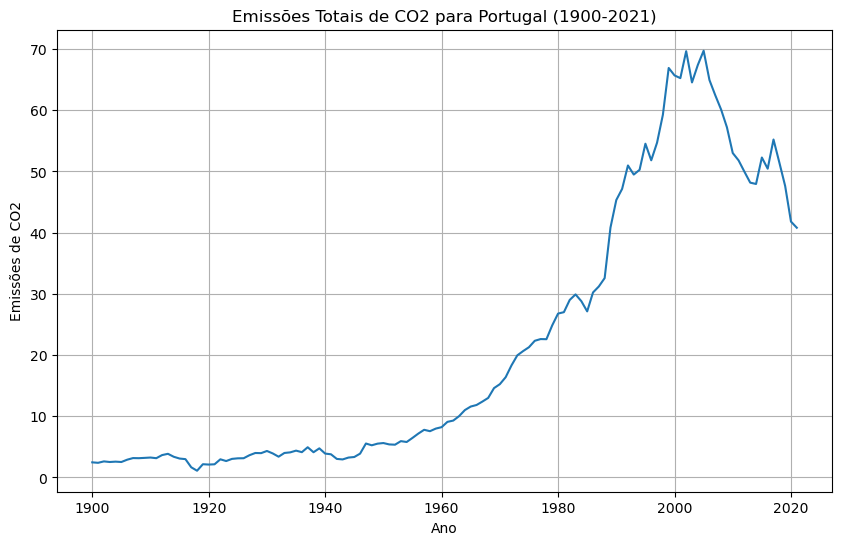

O ano com o máximo de emissões de CO2 para Portugal foi em 2005 com 69.718 milhões de toneladas.


In [2]:
#Pergunta 4.1 (1

# Filtrar os data de Portugal
data_portugal = data[data['country'] == 'Portugal']

plt.figure(figsize=(10, 6))
plt.plot(data_portugal['year'], data_portugal['co2'])
plt.title('Emissões Totais de CO2 para Portugal (1900-2021)')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2')
plt.grid(True)
plt.show()

ano_max_co2 = data_portugal.loc[data_portugal['co2'].idxmax(), 'year']
max_co2 = data_portugal['co2'].max()
print(f"O ano com o máximo de emissões de CO2 para Portugal foi em {ano_max_co2} com {max_co2} milhões de toneladas.")

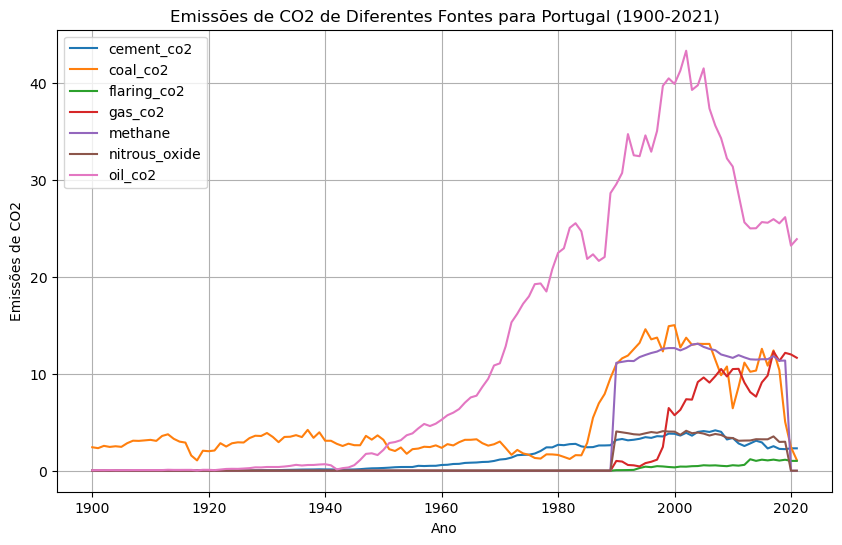

In [3]:
#Pergunta 4.1 (2


#Escolher as fontes
fontes = ['cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'methane', 'nitrous_oxide', 'oil_co2']

plt.figure(figsize=(10, 6))

#Adicionar ao grafico uma linha para cada fonte de emissão
for fonte in fontes:
    plt.plot(data_portugal['year'], data_portugal[fonte], label=fonte)
plt.title('Emissões de CO2 de Diferentes Fontes para Portugal (1900-2021)')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2')
plt.legend()
plt.grid(True)
plt.show()

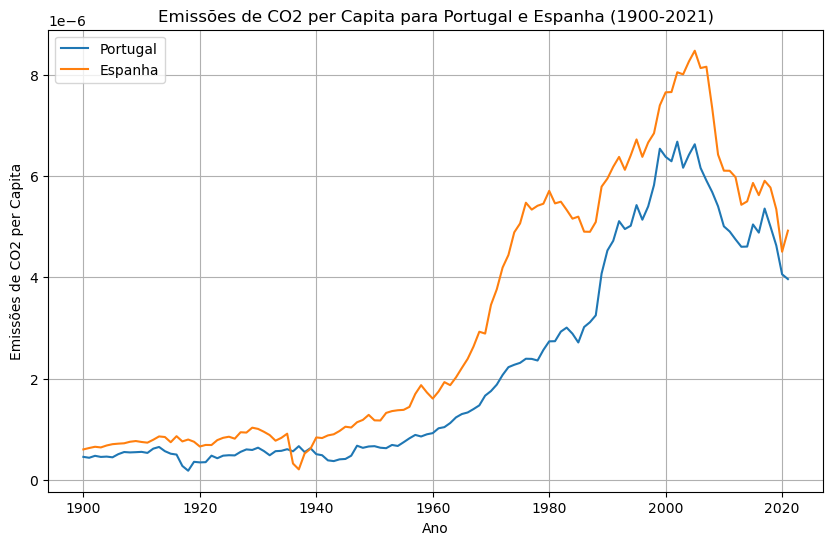

In [4]:
#Pergunta 4.1 (3

data_espanha = data[data['country'] == 'Spain']

plt.figure(figsize=(10, 6))
plt.plot(data_portugal['year'], data_portugal['co2'] / data_portugal['population'], label='Portugal')
plt.plot(data_espanha['year'], data_espanha['co2'] / data_espanha['population'], label='Espanha')
plt.title('Emissões de CO2 per Capita para Portugal e Espanha (1900-2021)')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 per Capita')
plt.legend()
plt.grid(True)
plt.show()

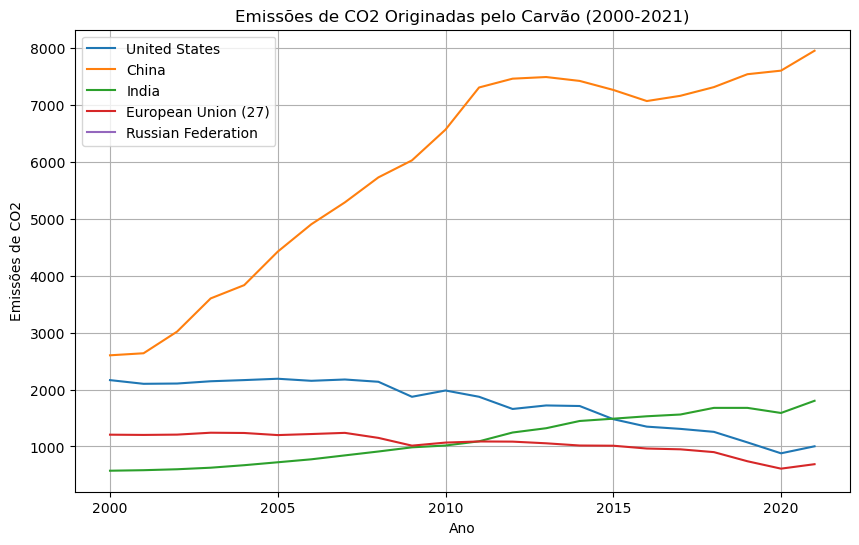

In [5]:
#Pergunta 4.1 (4

#Escolher os países
paises = ['United States', 'China', 'India', 'European Union (27)', 'Russian Federation']

#Recolher os data de carvão para cada país selecionado
data_carvao = data[data['country'].isin(paises) & (data['year'] >= 2000) & (data['year'] <= 2021)]

plt.figure(figsize=(10, 6))

#Adicionar uma linha para o valor de CO2 cada país 
for pais in paises:
    data_pais = data_carvao[data_carvao['country'] == pais]
    plt.plot(data_pais['year'], data_pais['coal_co2'], label=pais)
plt.title('Emissões de CO2 Originadas pelo Carvão (2000-2021)')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
#Pergunta 4.1 (5

# Selecionar os data relevantes para cada região
data_regioes = data[data['country'].isin(paises) & (data['year'] >= 2000) & (data['year'] <= 2021)]

# Calcular as médias
medias = data_regioes.groupby('country').mean()

# Formatar as médias para terem apenas três casas decimais
medias_formatadas = medias.round(3)

# Criar a tabela
tabela = medias_formatadas[['cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'methane', 'nitrous_oxide', 'oil_co2']]
tabela.columns = ['Cimento', 'Carvão', 'Queima', 'Gás', 'Metano', 'Óxido Nitroso', 'Petróleo']
tabela.index.name = 'Região'

# Mostrar a tabela
print(tabela)

                     Cimento    Carvão  Queima       Gás   Metano  \
Região                                                              
China                599.141  5920.797   1.722   287.021  923.388   
European Union (27)   81.488  1049.236  21.132   774.871  370.404   
India                 91.512  1123.795   2.661    92.464  561.237   
United States         40.055  1750.037  52.728  1364.198  581.050   

                     Óxido Nitroso  Petróleo  
Região                                        
China                      433.210  1116.257  
European Union (27)        216.801  1374.161  
India                      207.492   469.662  
United States              235.482  2379.692  


In [7]:
#Pergunta 4.2 (1

# Definir a amostra aleatória de anos
seed_value = 100
years = pd.Series([i for i in range(1900, 2021)])
sampleyears1 = years.sample(n=30, replace=False, random_state=seed_value)

# Selecionar apenas os anos da amostra para Portugal
sample_years1_data_portugal = data[(data['country'] == 'Portugal') & (data['year'].isin(sampleyears1))]

# Calcular a média do PIB para Portugal na amostra
mean_gdp_sample_years1_portugal = sample_years1_data_portugal['gdp'].mean()

# Selecionar apenas os anos da amostra para Hungria
sample_years1_data_hungary = data[(data['country'] == 'Hungary') & (data['year'].isin(sampleyears1))]

# Calcular a média do PIB para Hungria na amostra
mean_gdp_sample_years1_hungary = sample_years1_data_hungary['gdp'].mean()

# Realizar o teste de hipótese
alpha = 0.05
t_statistic, p_value = stats.ttest_ind(sample_years1_data_portugal['gdp'], sample_years1_data_hungary['gdp'], alternative='greater')

if p_value < alpha:
    print("Rejeitamos a hipótese nula. A média do PIB de Portugal na amostra é estatisticamente superior à média do PIB da Hungria na amostra.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para concluir que a média do PIB de Portugal na amostra é estatisticamente superior à média do PIB da Hungria na amostra.")


Não rejeitamos a hipótese nula. Não há evidências suficientes para concluir que a média do PIB de Portugal na amostra é estatisticamente superior à média do PIB da Hungria na amostra.


In [8]:
#Pergunta 4.2 (2

# Definir as amostras aleatórias de anos para Portugal e Hungria
seed_value = 55
years = pd.Series([i for i in range(1900, 2021)])
np.random.seed(seed_value)
sampleyears2 = years.sample(n=12, replace=False)

seed_value = 85
np.random.seed(seed_value)
sampleyears3 = years.sample(n=12, replace=False)

# Selecionar apenas os anos da amostra para Portugal
sample_years2_data_portugal = data[(data['country'] == 'Portugal') & (data['year'].isin(sampleyears2))]

# Calcular a média do PIB para Portugal na amostra
mean_gdp_sample_years2_portugal = sample_years2_data_portugal['gdp'].mean()

# Selecionar apenas os anos da amostra para Hungria
sample_years3_data_hungary = data[(data['country'] == 'Hungary') & (data['year'].isin(sampleyears3))]

# Calcular a média do PIB para Hungria na amostra
mean_gdp_sample_years3_hungary = sample_years3_data_hungary['gdp'].mean()

# Realizar o teste de hipótese
alpha = 0.05
t_statistic, p_value = stats.ttest_ind(sample_years2_data_portugal['gdp'], sample_years3_data_hungary['gdp'], alternative='greater')

if p_value < alpha:
    print("Rejeitamos a hipótese nula. A média do PIB de Portugal na amostra sampleyears2 é estatisticamente superior à média do PIB da Hungria na amostra sampleyears3.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para concluir que a média do PIB de Portugal na amostra sampleyears2 é estatisticamente superior à média do PIB da Hungria na amostra sampleyears3.")


Não rejeitamos a hipótese nula. Não há evidências suficientes para concluir que a média do PIB de Portugal na amostra sampleyears2 é estatisticamente superior à média do PIB da Hungria na amostra sampleyears3.


In [9]:
#Pergunta 4.2 (3

# Selecionar apenas os anos da amostra para os países relevantes
sample_years2_countries = ['United States', 'Russia', 'China', 'India', 'EU27']
sample_years2_data = data[(data['year'].isin(sampleyears2)) & (data['country'].isin(sample_years2_countries))]

# Realizar a ANOVA
modelo_anova = ols('co2 ~ country', data=sample_years2_data).fit()
anova_tabela = sm.stats.anova_lm(modelo_anova, typ=2)

print("Resultados da ANOVA:")
print(anova_tabela)

# Realizar o teste de Tukey para a análise post-hoc
compara_tukey = pairwise_tukeyhsd(endog=sample_years2_data['co2'], groups=sample_years2_data['country'], alpha=0.05)

print("\nComparação de médias (Tukey HSD):")
print(compara_tukey)


Resultados da ANOVA:
                sum_sq    df         F    PR(>F)
country   7.588369e+07   3.0  5.516841  0.002642
Residual  2.017388e+08  44.0       NaN       NaN

Comparação de médias (Tukey HSD):
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1     group2     meandiff  p-adj    lower      upper   reject
------------------------------------------------------------------
 China         India -2088.2044 0.0942 -4422.2264  245.8176  False
 China        Russia -1432.7108 0.3679 -3766.7327  901.3112  False
 China United States  1148.0462 0.5596 -1185.9757 3482.0682  False
 India        Russia   655.4937 0.8762 -1678.5283 2989.5157  False
 India United States  3236.2507 0.0032   902.2287 5570.2727   True
Russia United States   2580.757 0.0251    246.735  4914.779   True
------------------------------------------------------------------


Tabela de Correlação entre as Regiões:
country          Africa      Asia    Europe  North America   Oceania  \
country                                                                
Africa         1.000000  0.761158 -0.450142      -0.451522 -0.186042   
Asia           0.761158  1.000000 -0.768586      -0.833613 -0.640263   
Europe        -0.450142 -0.768586  1.000000       0.965935  0.846175   
North America -0.451522 -0.833613  0.965935       1.000000  0.874146   
Oceania       -0.186042 -0.640263  0.846175       0.874146  1.000000   
South America  0.590105  0.901911 -0.659977      -0.768845 -0.726124   

country        South America  
country                       
Africa              0.590105  
Asia                0.901911  
Europe             -0.659977  
North America      -0.768845  
Oceania            -0.726124  
South America       1.000000  


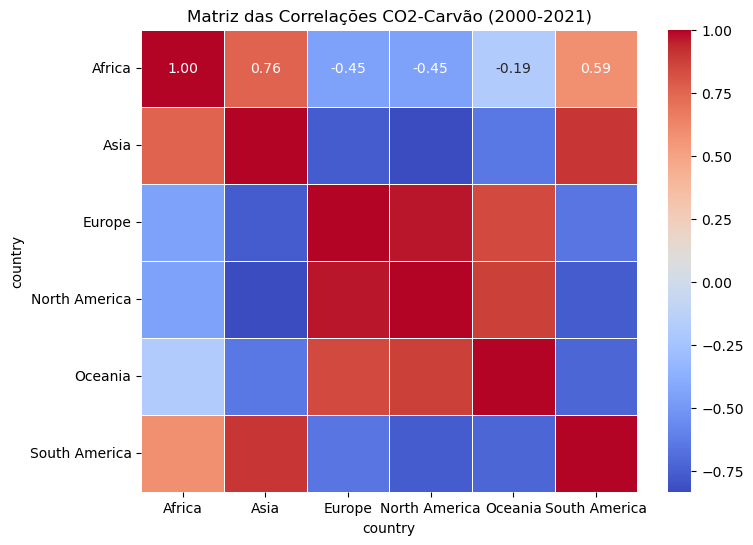

In [10]:
#Pergunta 4.3 (1

# Selecionar os data relevantes
regioes = ['Africa', 'Asia', 'South America', 'North America', 'Europe', 'Oceania']
data_carvao = data[(data['year'] >= 2000) & (data['year'] <= 2021) & (data['country'].isin(regioes))]

# Filtrar os data para incluir apenas as emissões de CO2 provenientes do carvão
data_carvao = data_carvao.pivot_table(index='year', columns='country', values='coal_co2')

# Calcular a tabela de correlação
tabela_correlacao = data_carvao.corr()

# Mostrar a tabela de correlação
print("Tabela de Correlação entre as Regiões:")
print(tabela_correlacao)
plt.figure(figsize=(8, 6)) 
sns.heatmap(tabela_correlacao,annot=True,  cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz das Correlações CO2-Carvão (2000-2021)')
plt.show()

In [11]:
#Pergunta 4.3 (2 

#a) 
data_filtrados = data[(data['year'] > 2000) & (data['year'] < 2022) & (data['year'] % 2 == 0)]
countrys = ['Germany', 'Russia', 'France', 'Portugal', 'Europe']
X = data_filtrados.pivot(index='year', columns='country', values='coal_co2')[countrys] 
X

X_value = X[['Germany', 'Russia', 'France', 'Portugal']]
Y = X['Europe'] 
X_pivot = sm.add_constant(X_value) 
model = sm.OLS(Y, X_value).fit() 
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Europe   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              6663.
Date:                Sat, 06 Apr 2024   Prob (F-statistic):                    4.56e-11
Time:                        19:50:45   Log-Likelihood:                         -47.099
No. Observations:                  10   AIC:                                      102.2
Df Residuals:                       6   BIC:                                      103.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Shapiro-Wilk: Statistics=0.9459769129753113, P-value=0.621212363243103


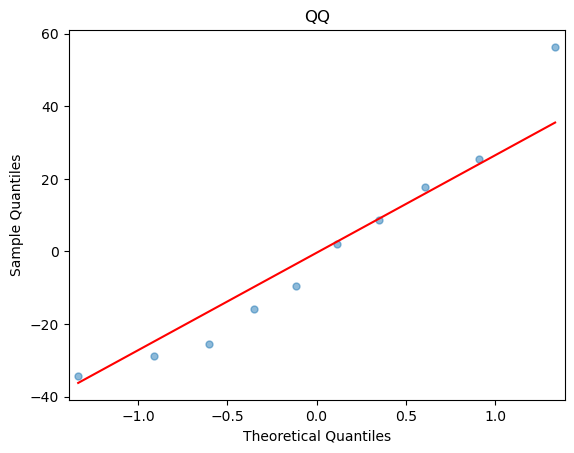

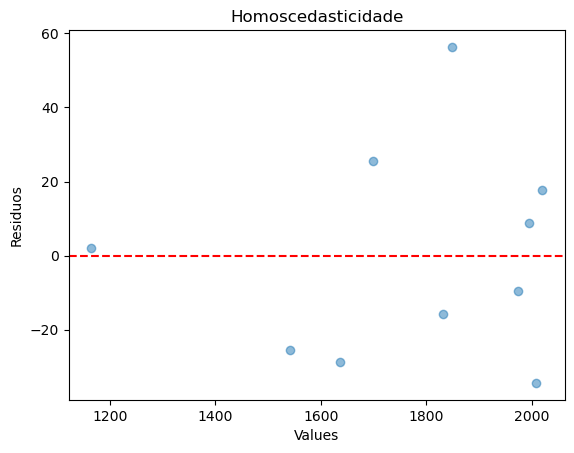

 DW: 1.7446669842132556


In [12]:
#b)

residuos = model.resid 
teste_shapiro = stats.shapiro(residuos)
print(f"Shapiro-Wilk: Statistics={teste_shapiro.statistic}, P-value={teste_shapiro.pvalue}")  
fig = sm.qqplot(residuos, line='s',markersize=5, alpha=0.5) 
plt.title('QQ') 
plt.show()  
plt.scatter(model.fittedvalues, residuos, alpha=0.5) 
plt.xlabel('Values') 
plt.ylabel('Residuos') 
plt.title('Homoscedasticidade')
plt.axhline(y=0, color='r', linestyle='--') 
plt.show() 
durbinWatson = durbin_watson(residuos)
print(' DW:', durbinWatson)


In [13]:
#c)

# Calcular VIF para cada variável independente
vif_data = X_pivot.assign(const=1)
vif_series = pd.Series([variance_inflation_factor(vif_data.values, i) 
                        for i in range(vif_data.shape[1])], 
                        index=vif_data.columns)

# Exibir os resultados
print("Fator de Inflação da Variância (VIF):\n", vif_series)

Fator de Inflação da Variância (VIF):
 const       640.592180
Germany       8.319501
Russia        3.356100
France        5.669954
Portugal      3.692608
dtype: float64


In [14]:
#d) 
# Os países têm VIFs moderados , o que significa que elas estão correlacionadas entre si, mas não de forma excessiva.

In [15]:
#e)

# Definir a lista de países
paises = ['Germany', 'Russia', 'France', 'Portugal']

# Filtrar os data para o ano de 2015
co2_2015 = data[data['year'] == 2015]

# Filtrar os data para os países específicos e para a Europa
co2_europa_2015 = co2_2015[co2_2015['country'].isin(paises)]

# Calcular a soma das emissões de CO2 do carvão para cada país e para a Europa em 2015
X_2015 = co2_europa_2015.pivot_table(index='year', columns='country', values='coal_co2').dropna()
Y_2015 = X_2015.sum(axis=1)

# Adicionar a constante ao modelo
X_2015_const = sm.add_constant(X_2015)

# Criar modelo de regressão linear
model = sm.OLS(Y_2015, X_2015_const).fit()

# Estimar a emissão de CO2 proveniente do carvão na Europa em 2015
Y_pred_2015 = model.predict(X_2015_const)

# Comparar com o valor real
print("\nEstimativa da Emissão de CO2 proveniente do carvão na Europa em 2015:")
print(Y_pred_2015)
print("\nValor Real da Emissão de CO2 proveniente do carvão na Europa em 2015:")
print(Y_2015)


Estimativa da Emissão de CO2 proveniente do carvão na Europa em 2015:
year
2015    805.393
dtype: float64

Valor Real da Emissão de CO2 proveniente do carvão na Europa em 2015:
year
2015    805.393
dtype: float64
